# Big6 Data Science part of project
You can run this project using your jupyter IDE by creating an environment in anaconda based on the provided yaml-file called "big6.yml".<br>
Just execute <br>
`conda env create -f [PATH_TO_FILE_ON_YOUR_MACHINE]/big6.yml`<br>
within your anaconda terminal

##  1. Transforming the VOSviewer data

In [1]:
import json
import codecs
import pandas as pd

filename = "VOSviewer/VOSviewer.json"

data = json.load(codecs.open(filename, "r", "utf-8-sig"))
items = data["network"]["items"]
vos = pd.DataFrame(items)[["label", "description", "url", "cluster"]]
vos.sort_values(by=["cluster"])

vos["assigned to"] = ""
names = ["Alessandro", "Albana", "Edoardo", "Riccardo", "Simone", "Luca"]
l = int(len(vos) / len(names)) + (len(vos) % len(names) > 0)
n = 0
i = 0
c = 1

for i in range(0, len(vos)):
    vos["assigned to"][i] = names[n]
    c += 1
    if c > l:
        n += 1
        c = 1

vos.to_excel("list_of_papers.xlsx")
vos


C:\Users\lucar\AppData\Local\Temp\ipykernel_16772\1544926286.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vos["assigned to"][i] = names[n]
C:\Users\lucar\AppData\Local\Temp\ipykernel_16772\1544926286.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vos["assigned to"][i] = names[n]
C:\Users\lucar\AppData\Local\Temp\ipykernel_16772\1544926286.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vos["assigned to"][i] = names[n

,label,description,url,cluster,assigned to
0,abdalla m. abdalla (2018),<table><tr><td>Authors:</td><td>abdalla m. abd...,https://doi.org/https://doi.org/10.1016/j.enco...,12,Alessandro
1,fan zhang (2016),<table><tr><td>Authors:</td><td>fan zhang; pen...,https://doi.org/https://doi.org/10.1016/j.ijhy...,12,Alessandro
2,ahmet özarslan (2012),<table><tr><td>Authors:</td><td>ahmet özarslan...,https://doi.org/https://doi.org/10.1016/j.ijhy...,4,Alessandro
3,pedro rodriguez (2012),<table><tr><td>Authors:</td><td>pedro rodrigue...,https://doi.org/https://doi.org/10.1109/tpel.2...,1,Alessandro
4,jingyang fang (2018a),<table><tr><td>Authors:</td><td>jingyang fang;...,https://doi.org/https://doi.org/10.1109/tpel.2...,5,Alessandro
...,...,...,...,...,...
107,ngoc bao lai (2021),<table><tr><td>Authors:</td><td>ngoc bao lai; ...,https://doi.org/https://doi.org/10.1109/tia.20...,8,Luca
108,k. sridharan (2020),<table><tr><td>Authors:</td><td>k. sridharan; ...,https://doi.org/https://doi.org/10.1109/piicon...,1,Luca
109,lajos torok (2016),<table><tr><td>Authors:</td><td>lajos torok; l...,https://doi.org/https://doi.org/10.1109/eeeic....,1,Luca
110,igor razzhivin (2022),<table><tr><td>Authors:</td><td>igor razzhivin...,https://doi.org/https://doi.org/10.1016/j.ijhy...,11,Luca


## 2. Conducting NLP to find important bi-grams and rank relevance of papers within universe by number of bi-grams within abstracts

In [2]:
import re

filename2 = "VOSviewer/abstracts.xlsx"
abstracts_df = pd.read_excel(filename2, index_col=0)
abstracts_df.sort_values(by=["cluster"], inplace=True)
abstracts_df


,cluster,label,description,url,assigned to,abstract
76,1,mohammad reza miveh (2016),<table><tr><td>Authors:</td><td>mohammad reza ...,https://doi.org/https://doi.org/10.1155/2016/9...,Simone,This paper proposes an improved multiloop cont...
75,1,arezoo nouralinejad (2014),<table><tr><td>Authors:</td><td>arezoo nourali...,https://doi.org/https://doi.org/10.1109/pedstc...,Riccardo,One of the critical issues in control of grid ...
40,1,hua geng (2011),<table><tr><td>Authors:</td><td>hua geng; dewe...,https://doi.org/https://doi.org/10.1109/tie.20...,Edoardo,\nThis paper presents a novel hardware-based a...
94,1,lajos torok (2017),<table><tr><td>Authors:</td><td>lajos torok; l...,https://doi.org/https://doi.org/10.1109/tia.20...,Simone,"In this paper, a new feed forward dc-link volt..."
102,1,k. sridharan (2021),<table><tr><td>Authors:</td><td>k. sridharan; ...,https://doi.org/https://doi.org/10.1109/tim.20...,Luca,Grid synchronization algorithm is used to trac...
...,...,...,...,...,...,...
44,14,jia liu (2021b),<table><tr><td>Authors:</td><td>jia liu; sunli...,https://doi.org/https://doi.org/10.1016/j.apen...,Edoardo,\nThe study proposes a robust energy planning ...
5,15,marian p. kazmierkowski (2011),<table><tr><td>Authors:</td><td>marian p. kazm...,https://doi.org/https://doi.org/10.1109/tii.20...,Alessandro,This paper proposes an extended Direct Power C...
56,15,a. hemdani (2015),<table><tr><td>Authors:</td><td>a. hemdani; mo...,https://doi.org/https://doi.org/10.1049/iet-pe...,Edoardo,\nThis paper presents an indirect sliding mode...
101,16,weiyi zhang (2015),<table><tr><td>Authors:</td><td>weiyi zhang; a...,https://doi.org/https://doi.org/10.1109/pedg.2...,Luca,Improving the dynamics of the widely applied g...


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import string

nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("wordnet")
stop_words = stopwords.words("english")
stop_words.extend(["abstract", "paper"])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
pos_test = []
for text in abstracts_df.abstract:
    h = []
    tokens = nltk.word_tokenize(text)
    tag = nltk.pos_tag(tokens)

    # Unimportant
    [
        h.append(word)
        for (word, pos) in tag
        if pos != "VB"
        and pos != "VBD"
        and pos != "VBG"
        and pos != "VBN"
        and pos != "VBP"
        and pos != "RB"
        and pos != "RBR"
        and pos != "RBS"
        and pos != "WRB"
        and pos != "DT"
        and pos != "TO"
        and pos != "DT"
        and pos != "VBZ"
        and pos != "CC"
        and pos != "IN"
    ]
    pos_test.append(h)


def listToString(s):
    str1 = " "
    return str1.join(s)


corpus_list = []
for i in pos_test:
    text = listToString(i)
    corpus_list.append(text)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

keyphrase_list = []
n_gram_range = (2, 3)
for i in range(len(corpus_list)):
    doc = re.sub(r"[0-9]+", "", corpus_list[i]).lower()
    doc = re.sub("[^\w\s]", " ", doc)
    doc = re.sub("\s+", " ", doc)
    doc = [doc]

    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit(doc)
    keyphrase = count.get_feature_names_out()

    keyphrase_out = []
    for j in range(len(keyphrase)):
        if abstracts_df.abstract[i].lower().find(keyphrase[j]) > 0:
            tokens = nltk.word_tokenize(keyphrase[j])
            tag = nltk.pos_tag(tokens)
            if tag[-1][1] != "JJ" and tag[-1][1] != "JJR" and tag[-1][1] != "JJS":
                keyphrase_out.append(keyphrase[j])
            else:
                print(i, "Remove adj:", keyphrase[j])
        else:
            print(i, "Remove:", keyphrase[j])
    keyphrase_list.append(keyphrase_out)

0 Remove: analysis pi
0 Remove: analysis pi controller
0 Remove: approach simulation
0 Remove: approach simulation results
0 Remove: autonomous distribution
0 Remove: autonomous distribution network
0 Remove: challenge stationary
0 Remove: challenge stationary reference
0 Remove: command zero
0 Remove: command zero steady
0 Remove: conditions control
0 Remove: conditions control strategy
0 Remove: control loop
0 Remove: control loop instantaneous
0 Remove: control strategy
0 Remove: control strategy proportional
0 Remove: control strategy three
0 Remove: controller current
0 Remove: controller current control
0 Remove: controller order
0 Remove: controller order challenge
0 Remove: controller proportional
0 Remove: controller proportional current
0 Remove: controller rotating
0 Remove: controller rotating frame
0 Remove: current control
0 Remove: current control loop
0 Remove: current loop
0 Remove: current loop phase
0 Remove: design frequency
0 Remove: design frequency response
0 Rem

In [6]:
length = 0
for i in range(len(keyphrase_list)):
    length = length + len(keyphrase_list[i])

print("List of keyphrase: \n", keyphrase)

List of keyphrase: 
 ['admittance control' 'admittance control electrical' 'alternative new'
 'alternative new control' 'behavior network'
 'behavior network generation' 'big synchronous'
 'big synchronous generation' 'classical synchronous'
 'classical synchronous generators' 'complex robust'
 'complex robust alternative' 'concept virtual'
 'concept virtual admittance' 'conditions different'
 'conditions different control' 'connection electronic'
 'connection electronic power' 'control electrical'
 'control electrical performance' 'control structures'
 'control structures converters' 'control structures operation'
 'control structures rise' 'control technique' 'control technique grid'
 'converter need' 'converter need different' 'converters behavior'
 'converters behavior network' 'converters concept'
 'converters concept virtual' 'converters electrical'
 'converters electrical network' 'converters order'
 'converters order grid' 'desired electrical'
 'desired electrical operation' 'd

In [7]:
remaining_keywords_lists = [x for x in keyphrase_list if x]
remaining_keywords_list = [
    item for sublist in remaining_keywords_lists for item in sublist
]
remaining_keywords_list

['power converters',
 'hydrogen storage',
 'criteria decision',
 'energy storage',
 'hydrogen energy',
 'hydrogen energy storage',
 'energy storage',
 'energy storage',
 'hydrogen energy',
 'hydrogen energy storage',
 'hydrogen storage',
 'energy storage',
 'hydrogen underground',
 'hydrogen underground storage',
 'underground storage',
 'energy storage',
 'energy systems',
 'hydrogen storage',
 'power grid',
 'renewable energy',
 'renewable energy systems',
 'energy sources',
 'storage system',
 'based storage',
 'based storage system',
 'hydrogen based',
 'hydrogen based storage',
 'hydrogen production',
 'renewable energy',
 'renewable sources',
 'storage system',
 'demand response',
 'energy storage',
 'generation power',
 'hydrogen energy',
 'hydrogen energy storage',
 'power system',
 'energy storage',
 'energy storage system',
 'renewable energy',
 'storage system',
 'energy sources',
 'renewable energy',
 'renewable energy sources',
 'storage system',
 'renewable energy',
 'hyd

In [8]:
abstracts_df["keywords"] = keyphrase_list
keywords = abstracts_df[abstracts_df["keywords"].map(lambda d: len(d)) > 0]
s = keywords.keywords.str.len().sort_values(ascending=False).index
keyword_df = abstracts_df.reindex(s)
keyword_df.reset_index(drop=True, inplace=True)
keyword_df.to_excel("by_keyword.xlsx")
keyword_df


,cluster,label,description,url,assigned to,abstract,keywords
0,6,kevin knosala (2021),<table><tr><td>Authors:</td><td>kevin knosala;...,https://doi.org/https://doi.org/10.1016/j.ijhy...,Edoardo,\nThis study compares technology pathways for ...,"[battery systems, energy storage, family build..."
1,3,marcos tostado-véliz (2022),<table><tr><td>Authors:</td><td>marcos tostado...,https://doi.org/https://doi.org/10.1016/j.est....,Simone,Hydrogen produced from renewable sources (gree...,"[based storage, based storage system, hydrogen..."
2,11,mohammadreza daneshvar (2021),<table><tr><td>Authors:</td><td>mohammadreza d...,https://doi.org/https://doi.org/10.1016/j.ijhy...,Albana,"In recent years, renewable energy sources (RES...","[energy sources, energy storage, hes system, h..."
3,3,daniel scamman (2015),<table><tr><td>Authors:</td><td>daniel scamman...,https://doi.org/https://doi.org/10.1016/j.ijhy...,Edoardo,\nThis paper proposes off-grid hybrid systems ...,"[energy storage, energy systems, hydrogen stor..."
4,3,mubbashir ali (2018),<table><tr><td>Authors:</td><td>mubbashir ali;...,https://doi.org/https://doi.org/10.3390/en1105...,Riccardo,"From an environment perspective, the increased...","[demand response, energy storage, generation p..."
5,10,mohammad mirzaei (2019),<table><tr><td>Authors:</td><td>mohammad mirza...,https://doi.org/https://doi.org/10.1016/j.ijhy...,Albana,Because of highly increasing energy consumptio...,"[energy storage, hydrogen energy, hydrogen ene..."
6,12,abdalla m. abdalla (2018),<table><tr><td>Authors:</td><td>abdalla m. abd...,https://doi.org/https://doi.org/10.1016/j.enco...,Alessandro,The increasing global demand for energy due to...,"[energy source, energy sources, renewable ener..."
7,8,ali tayyebi (2020a),<table><tr><td>Authors:</td><td>ali tayyebi; d...,https://doi.org/https://doi.org/10.1109/jestpe...,Alessandro,This article discusses the challenges of maint...,"[forming converters, frequency stability, powe..."
8,3,tiejiang yuan (2018),<table><tr><td>Authors:</td><td>tiejiang yuan;...,https://doi.org/https://doi.org/10.3390/en1104...,Simone,This paper presents a doubly fed induction gen...,"[energy storage, energy storage system, renewa..."
9,3,s. fukaume (2022),<table><tr><td>Authors:</td><td>s. fukaume; yu...,https://doi.org/https://doi.org/10.1016/j.ijhy...,Luca,We propose a self-sustaining power supply syst...,"[energy sources, renewable energy, renewable e..."


## 3. Visualizations

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


### 3.1 Wordcloud

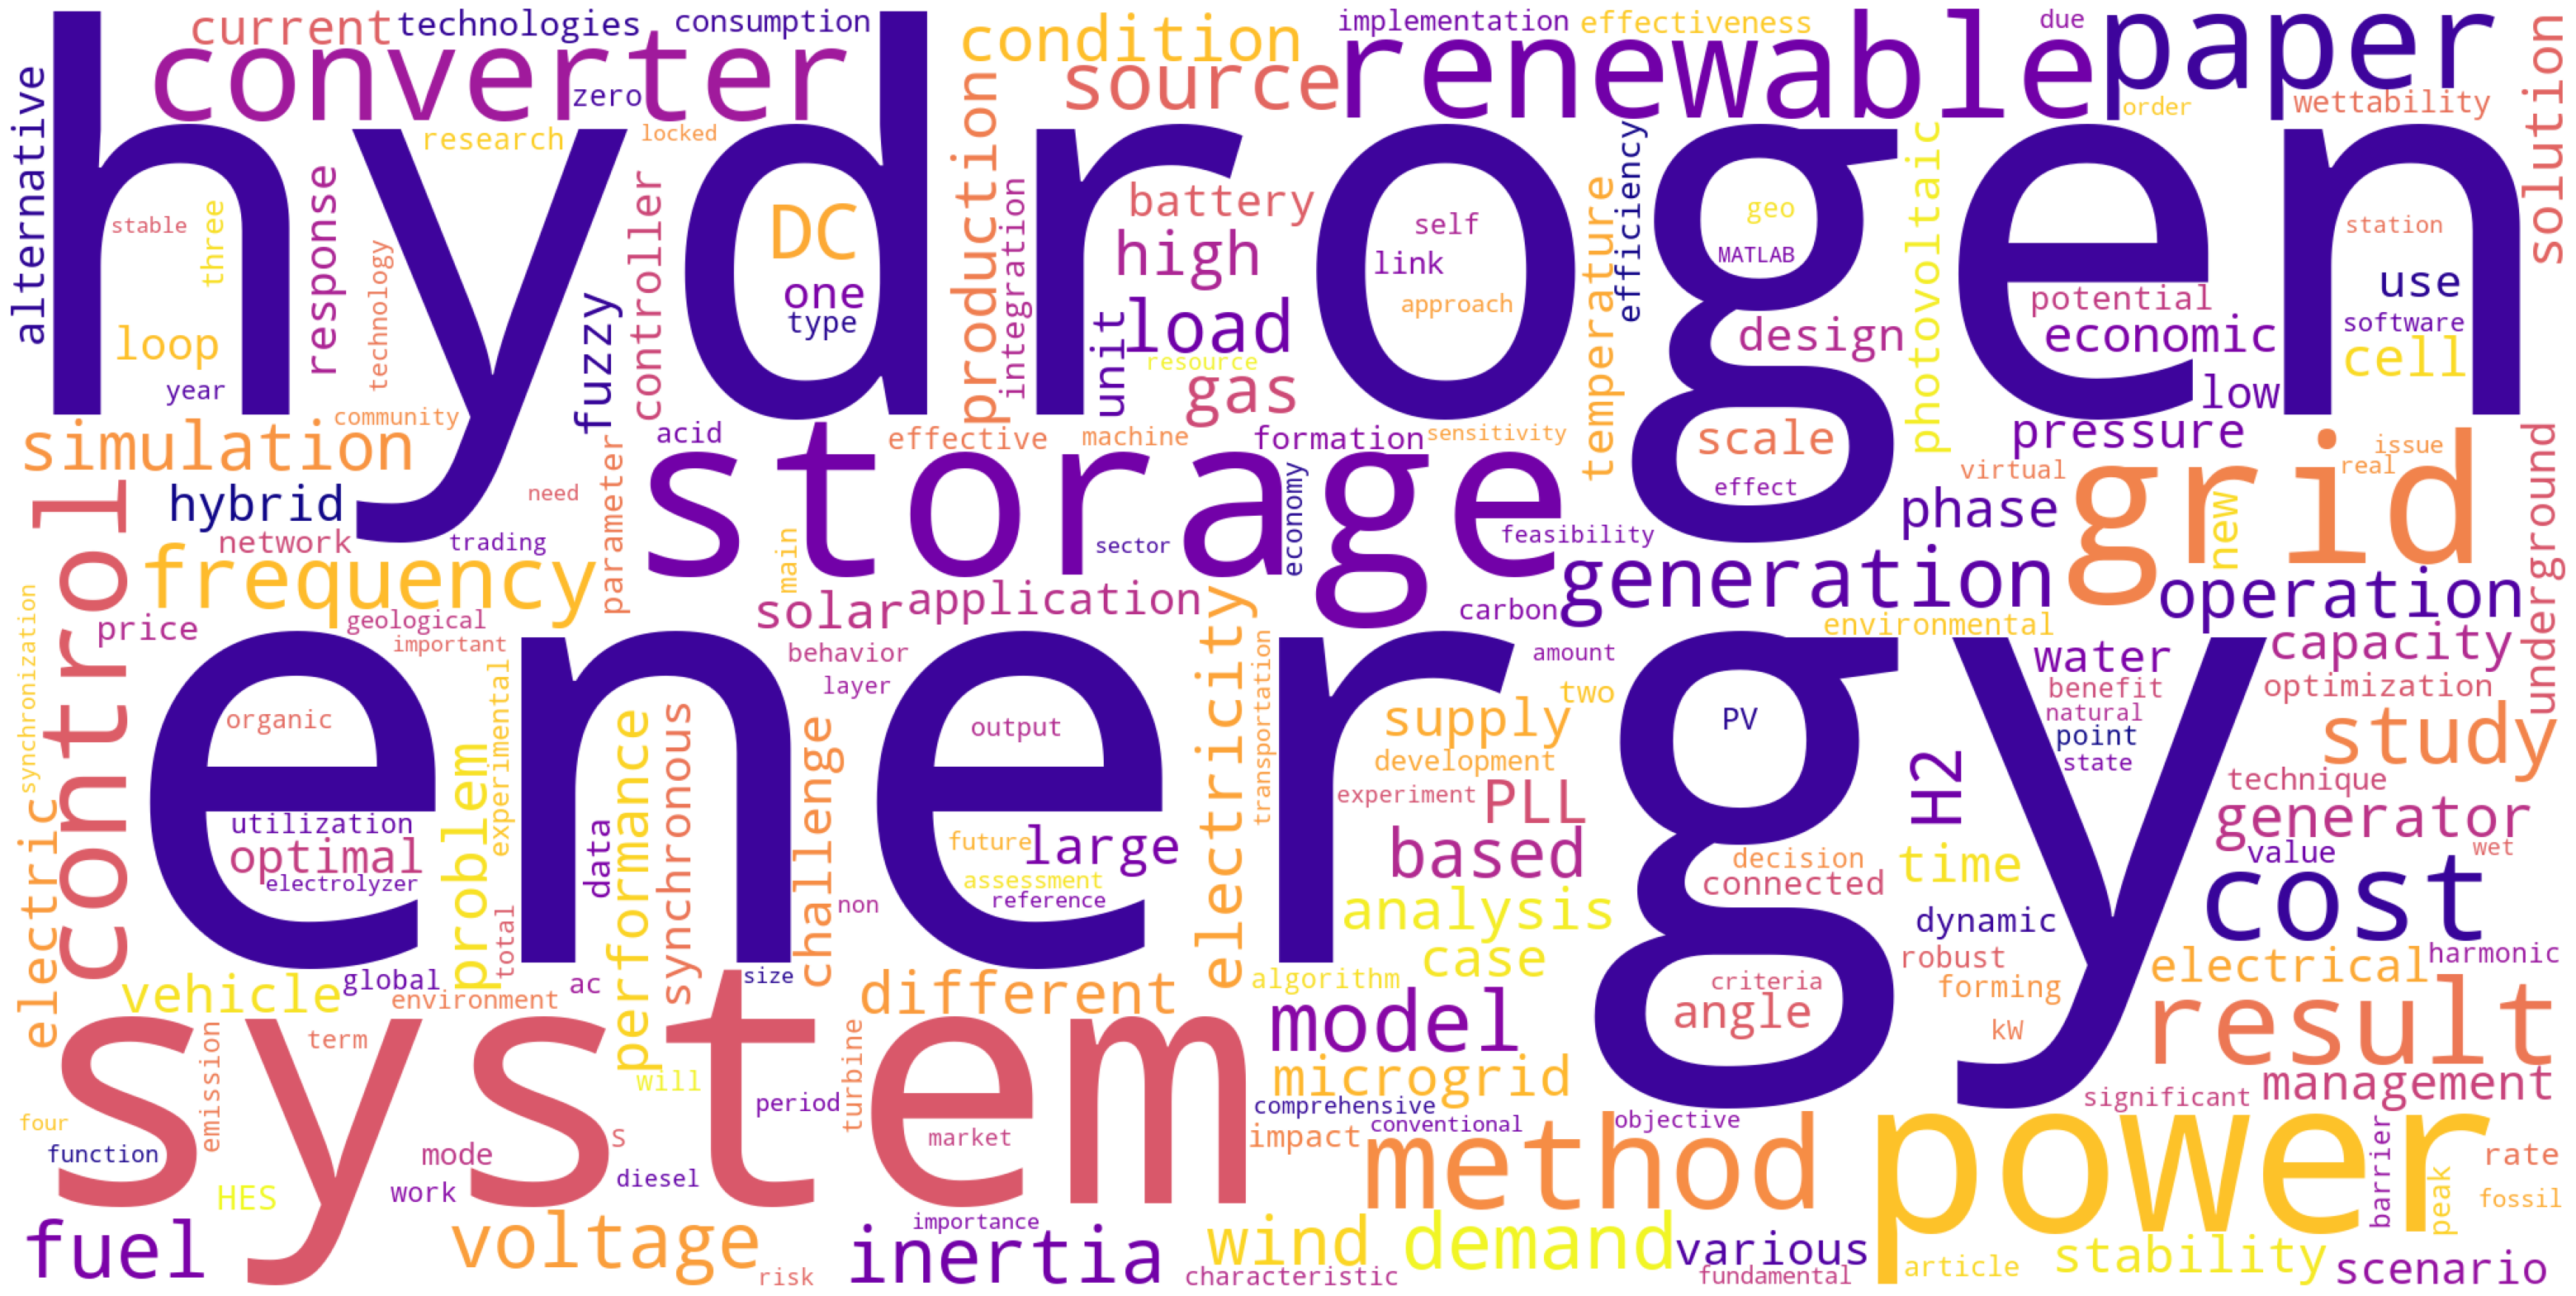

In [10]:
from wordcloud import WordCloud, STOPWORDS

def cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")


wordcloud = WordCloud(
    width=2000,
    height=1000,
    random_state=42,
    background_color="white",
    colormap="plasma",
    collocations=False,
    stopwords=STOPWORDS,
).generate(" ".join(corpus_list))

cloud(wordcloud)

### 3.2 Countplot of relevant keyphrases

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

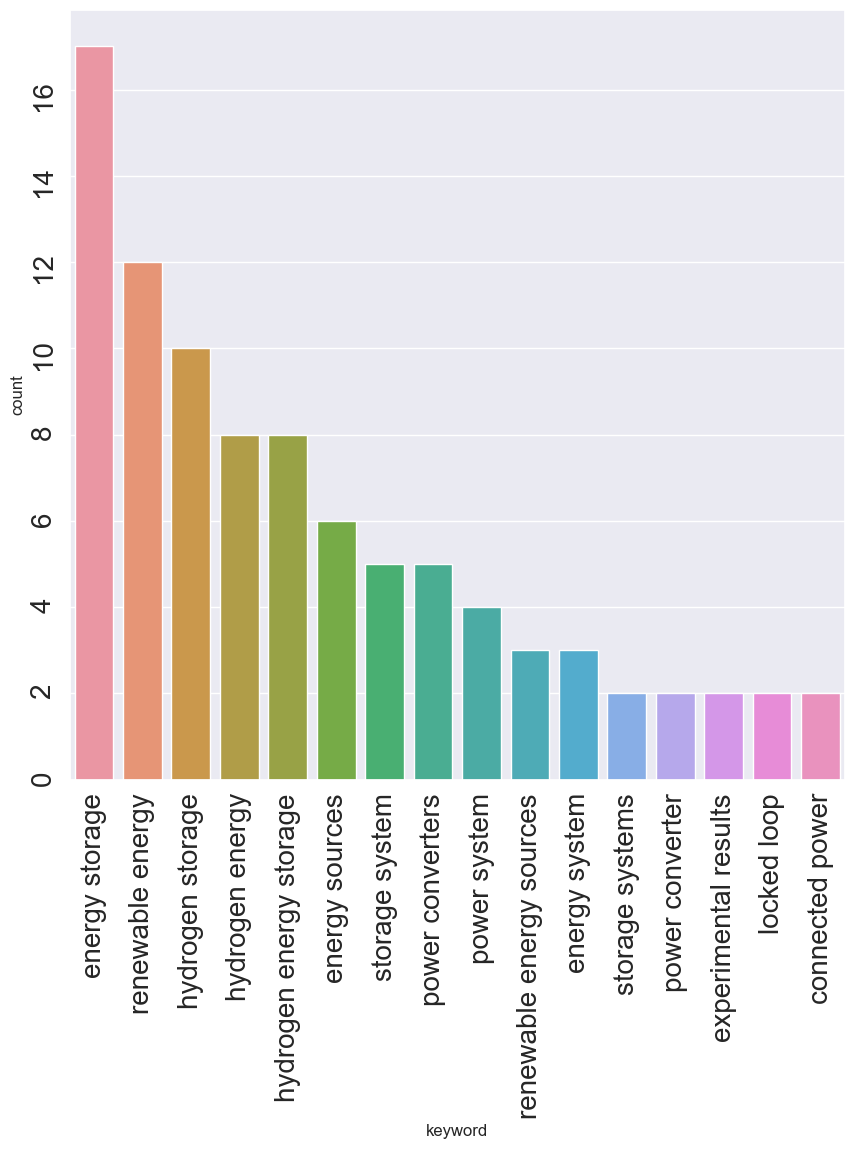

In [11]:
import seaborn as sns

# Most relevant bi-grams
unique_df = pd.DataFrame(data={"keyword": remaining_keywords_list})
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
ax = sns.countplot(
    data=unique_df,
    x="keyword",
    order=pd.value_counts(unique_df.keyword).iloc[:16].index,
)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=90, fontsize=20)

## 4. Topic Modeling with Gensim

In [12]:
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
from spacy.cli.download import download
import pyLDAvis
import pyLDAvis.gensim_models

In [13]:
def sent2words(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))


data_words = list(sent2words(corpus_list))

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[data_words[0]]])

['paper', 'improved', 'multiloop', 'control', 'strategy', 'three', 'phase', 'four', 'leg', 'voltage', 'source', 'inverter', 'vsi', 'unbalanced', 'loads', 'autonomous', 'distribution', 'network', 'main', 'objective', 'output', 'voltages', 'four', 'leg', 'inverter', 'unbalanced', 'load', 'conditions', 'control', 'strategy', 'proportional', 'integral', 'pi', 'voltage', 'controller', 'proportional', 'current', 'loop', 'phase', 'voltage', 'controller', 'current', 'control', 'loop', 'instantaneous', 'output', 'voltage', 'pulse', 'width', 'modulation', 'pwm', 'voltage', 'command', 'zero', 'steady', 'state', 'error', 'fast', 'transient', 'response', 'voltage', 'feedforward', 'path', 'system', 'robustness', 'outer', 'voltage', 'loop', 'synchronous', 'reference', 'frame', 'stability', 'analysis', 'pi', 'controller', 'order', 'challenge', 'stationary', 'reference', 'frame', 'equivalent', 'voltage', 'controller', 'rotating', 'frame', 'systematic', 'design', 'frequency', 'response', 'approach', 'si

In [14]:
def stopwords(texts):
    return [
        [word for word in simple_preprocess(str(doc)) if word not in stop_words]
        for doc in texts
    ]


def bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(
            [token.lemma_ for token in doc if token.pos_ in allowed_postags]
        )
    return texts_out

In [15]:
nostops = stopwords(data_words)
bigrams = bigrams(nostops)

nlp = spacy.load("en_core_web_sm")

data_lemmatized = lemmatization(bigrams, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"])

id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=42,
    update_every=1,
    chunksize=50,
    passes=500,
    alpha="auto",
    per_word_topics=True,
)

In [17]:
print("\nPerplexity: ", lda_model.log_perplexity(corpus))

coherence_lda = CoherenceModel(
    model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence="c_v"
)
coherence_lda = coherence_lda.get_coherence()

print("\nCoherence: ", coherence_lda)



Perplexity:  -6.391166002012228

Coherence:  0.5358957964867271


In [18]:
lda_model.print_topics()

[(0,
  '0.016*"penalty" + 0.014*"hydrogen" + 0.012*"site" + 0.012*"station" + 0.012*"model" + 0.011*"storage" + 0.011*"datum" + 0.011*"diesel_generator" + 0.011*"baseline" + 0.011*"coverage"'),
 (1,
  '0.075*"energy" + 0.040*"system" + 0.039*"hydrogen" + 0.032*"storage" + 0.023*"renewable" + 0.023*"power" + 0.016*"cost" + 0.012*"study" + 0.010*"load" + 0.009*"generation"'),
 (2,
  '0.055*"storage" + 0.038*"hydrogen" + 0.014*"capacity" + 0.012*"formation" + 0.012*"gas" + 0.011*"pressure" + 0.010*"wettability" + 0.010*"review" + 0.010*"geological" + 0.009*"temperature"'),
 (3,
  '0.044*"power" + 0.038*"converter" + 0.035*"grid" + 0.024*"control" + 0.023*"frequency" + 0.019*"inertia" + 0.016*"phase" + 0.016*"voltage" + 0.016*"system" + 0.014*"method"'),
 (4,
  '0.041*"trading" + 0.023*"grid" + 0.022*"peer" + 0.017*"management" + 0.017*"power" + 0.016*"community" + 0.012*"model" + 0.011*"group" + 0.011*"mode" + 0.011*"operation"')]

In [19]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'lda.html')
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.038340  0.177127       1        1  47.773527
3      0.230689  0.058422       2        1  20.925746
2     -0.182591  0.027724       3        1  20.906443
4      0.051699 -0.157340       4        1   5.700073
0     -0.061457 -0.105932       5        1   4.694210, topic_info=             Term        Freq       Total Category  logprob  loglift
197        energy  310.000000  310.000000  Default  30.0000  30.0000
209       storage  227.000000  227.000000  Default  29.0000  29.0000
84          power  176.000000  176.000000  Default  28.0000  28.0000
202      hydrogen  228.000000  228.000000  Default  27.0000  27.0000
71           grid  113.000000  113.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
599  installation    2.013632    6.117045   Topic5  -5.2737   1.9477
71           grid    4.097031  113.275694   Topic5  -4.5634  -0.2607
209       storage    4.389952  227.247360   Topic5  -4.4944  -0.8879
316      economic    2.592415   20.007407   Topic5  -5.0211   1.0153
45     simulation    2.233726   30.817378   Topic5  -5.1700   0.4344

[289 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
883       5  0.598728   achievable
1036      3  0.972194         acid
826       2  0.861963       active
0         1  0.277219     analysis
0         2  0.311871     analysis
...     ...       ...          ...
1033      3  0.876171          wet
1034      3  0.977951  wettability
523       1  0.985184         wind
646       1  0.405596        world
646       5  0.608394        world

[371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])